<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/Assignment_Text_Mining_(_Amazon_Review_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import requests 
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [18]:
#creating an empty review list
iphone_reviews = []

In [19]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B08L5T44CQ/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

In [20]:
##Writing reviews in a text file
with open("iphone.txt","w",encoding = 'utf-8') as output:
    output.write(str(iphone_reviews))

In [21]:
import os
os.getcwd()

'/content'

In [22]:
## Joining all the reviews into single paragraph
red_rev_string = " ".join(iphone_reviews)

In [23]:
red_rev_string

"\nAs usual great & premium phone of 2020 .ProsThis time the Apple iPhone 12 uses the right-angled bezel of the iPhone 4S, which looks square, and it feels good in the hand. It feels better than the sleek bezel of the iPhone X, especially the 7.4mm thickness with right angles. The border is particularly stylish.The camera is awesome! The night view mode turns on automatically, and the imaging effect is really good! Video stabilization is also good!!!!!!!!The filter mode is quite good. Many Android phones are still many miles away from these tones even though there are good imitations. Apple was able to improve its tones.Image quality is perfect and there is little or no noise even in a low-light environment .** Signal, nothing to say! It is much better in iPhone 12 Pro & Wifi also .ConsThere is a problem with the hand-handling of this phone. Oh yes, the iPhone 12 is light to handle, however, it is not easy to handle. The iPhone 12 comes with metal edges and there have been multiple com

In [24]:
##Splitting each word with space -- Tokanization
red_rev_words = red_rev_string.split(" ")

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [27]:
## Joining all the reviews into single paragraph
red_rev_string =" ".join(red_rev_words)

In [28]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud

wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_rev_string)

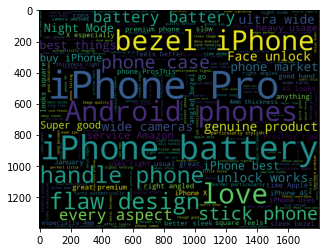

In [29]:
plt.imshow(wordcloud_ip)

In [30]:
from google.colab import files
uploaded = files.upload()

Saving negative-words.txt to negative-words (1).txt


In [38]:
uploaded

{'negative-words.txt': b';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\n; \n; Opinion Lexicon: Negative\n;\n; This file contains a list of NEGATIVE opinion words (or sentiment words).\n;\n; This file and the papers can all be downloaded from \n;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html\n;\n; If you use this list, please cite one of the following two papers:\n;\n;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." \n;       Proceedings of the ACM SIGKDD International Conference on Knowledge \n;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, \n;       Washington, USA, \n;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing \n;       and Comparing Opinions on the Web." Proceedings of the 14th \n;       International World Wide Web conference (WWW-2005), May 10-14, \n;       2005, Chiba, Japan.\n;\n; Notes: \n;    1. The appearance of an opinion word in a sentence does not neces

In [41]:
file_name = "negative-words.txt"

In [59]:
negwords=uploaded[file_name].decode("ISO-8859-1").split("\n")

In [60]:
negwords =negwords[37:]

In [61]:
##Considering only the words which are present in the positive words

red_pos = " ".join([w for w in red_rev_words if w in negwords])

In [62]:
red_pos

'noise problem complaints falling scar flaw flaw bad skeptical   cons  issue  issues cheap miss  issue problem lag dark noise problem complaints falling scar flaw flaw bad skeptical   cons  issue  issues cheap miss  issue problem lag dark noise problem complaints falling scar flaw flaw bad skeptical   cons  issue  issues cheap miss  issue problem lag dark noise problem complaints falling scar flaw flaw bad skeptical   cons  issue  issues cheap miss  issue problem lag dark noise problem complaints falling scar flaw flaw bad skeptical   cons  issue  issues cheap miss  issue problem lag dark noise problem complaints falling scar flaw flaw bad skeptical   cons  issue  issues cheap miss  issue problem lag dark noise problem complaints falling scar flaw flaw bad skeptical   cons  issue  issues cheap miss  issue problem lag dark noise problem complaints falling scar flaw flaw bad skeptical   cons  issue  issues cheap miss  issue problem lag dark noise problem complaints falling scar flaw flaw

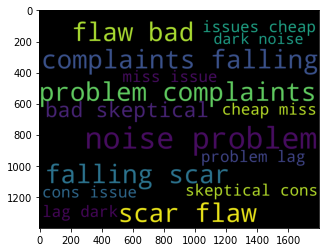

In [63]:
##Building Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(red_pos)

plt.imshow(wordcloud_pos)

###Emotion Mining

In [64]:
url = 'https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/Afinn.csv'

In [65]:
#Sentiment analysis
import pandas as pd


In [66]:
afinn = pd.read_csv(url, sep=',', encoding='latin-1')

In [67]:
afinn.shape

(2477, 2)

In [68]:
afinn.head(20)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [70]:
from nltk import tokenize

In [72]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [73]:
red_unique = tokenize.sent_tokenize(" ".join(iphone_reviews))
red_unique[5:15]

['!The filter mode is quite good.',
 'Many Android phones are still many miles away from these tones even though there are good imitations.',
 'Apple was able to improve its tones.Image quality is perfect and there is little or no noise even in a low-light environment .',
 '** Signal, nothing to say!',
 'It is much better in iPhone 12 Pro & Wifi also .ConsThere is a problem with the hand-handling of this phone.',
 'Oh yes, the iPhone 12 is light to handle, however, it is not easy to handle.',
 'The iPhone 12 comes with metal edges and there have been multiple complaints with respect to these edges.',
 'If you handle this phone for a long time, as your hand becomes a bit moist, the metal becomes slippery.',
 'To prevent your phone from falling to the ground, you will sub-consciously tighten your grip on the phone.',
 'Several reports have shown that tightening your grip on the iPhone 12 leaves you with a scar on your palm.']

In [74]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,\nAs usual great & premium phone of 2020 .Pros...
1,It feels better than the sleek bezel of the iP...
2,The border is particularly stylish.The camera ...
3,"The night view mode turns on automatically, an..."
4,Video stabilization is also good!!!!!!!
...,...
725,Especially there is no phone in market clickin...
726,Graphite colour is lovely with glossy sides.
727,Stunning look.Awesome experience using dark mo...
728,makes life so easy and seamless.


In [75]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [76]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [77]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        word = nlp(text)
        for word in red_unique:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [78]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [79]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [80]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)

In [81]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0    32
1    18
2     8
3    14
4     5
5     6
6    17
7    23
8     5
9    21
Name: word_count, dtype: int64

In [82]:
sent_df.sort_values(by='sentiment_value').tail(10)

,word,sentiment_value,word_count
546,"But overall , its good phone and worth the pri...",13,49
254,"But overall , its good phone and worth the pri...",13,49
327,"But overall , its good phone and worth the pri...",13,49
181,"But overall , its good phone and worth the pri...",13,49
35,"But overall , its good phone and worth the pri...",13,49
692,"But overall , its good phone and worth the pri...",13,49
619,"But overall , its good phone and worth the pri...",13,49
108,"But overall , its good phone and worth the pri...",13,49
400,"But overall , its good phone and worth the pri...",13,49
473,"But overall , its good phone and worth the pri...",13,49


In [83]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,word,sentiment_value,word_count
1,It feels better than the sleek bezel of the iP...,0,18
8,"** Signal, nothing to say!",0,5
9,It is much better in iPhone 12 Pro & Wifi also...,-2,21
11,The iPhone 12 comes with metal edges and there...,0,18
12,"If you handle this phone for a long time, as y...",0,20


In [84]:
sent_df[sent_df['sentiment_value']>=10].head()

,word,sentiment_value,word_count
35,"But overall , its good phone and worth the pri...",13,49
61,This iPhone 12pro Is the best in all the thing...,11,41
65,I ordered the phone on 20th June at night (11:...,10,27
70,Stunning look.Awesome experience using dark mo...,11,14
108,"But overall , its good phone and worth the pri...",13,49


In [85]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


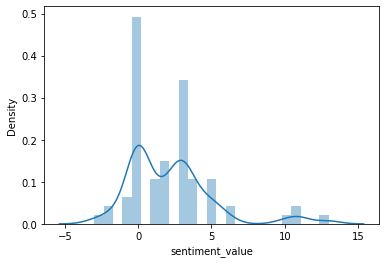

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

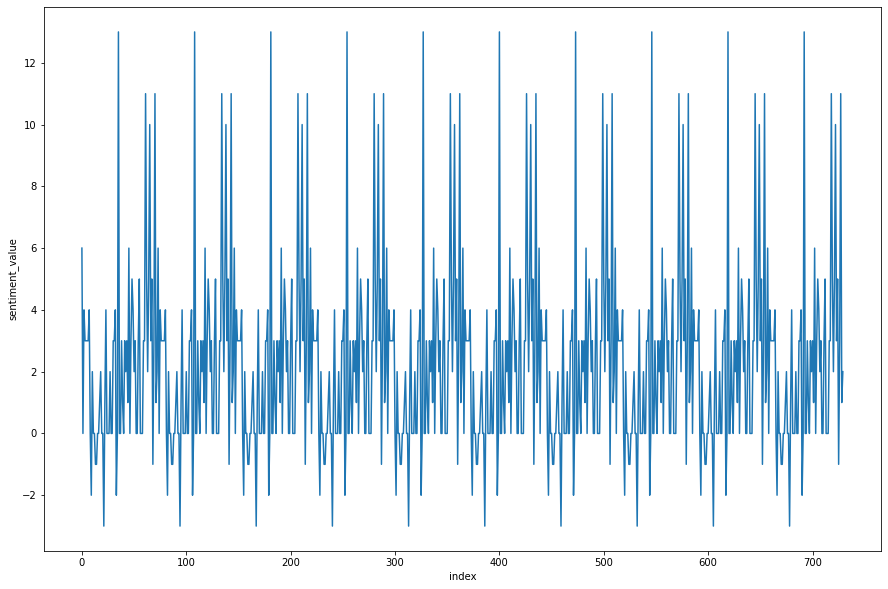

In [87]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)